In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# path variables for KEVIN

path = "D:\Kevin Liang/Documents/1_UT_SENIOR/UT_AUSTIN_FALL_2017/EE_379K/Data_Science_Final_Project/Kickstarter_Data/"

In [4]:
# data - dataset as a DataFrame object
# list_of_features - features that need to be one hot encoded

def ohe_data(data, list_of_features):
    ohe = data[list_of_features]
    new_data = data.drop(list_of_features, axis = 1)
    ohe_features = pd.get_dummies(ohe)
    return pd.concat([new_data,ohe_features], axis = 1)

In [40]:
data = pd.read_csv(path + "Kickstarter.csv", header = 0, index_col = 0)
# these features are dropped because the data is missing, the data is irrelevant, or another column captures the information.
dropped_features = ["slug", "currency_symbol", "permissions", "is_backing", "is_starred", "friends"]

data = data.drop(dropped_features, axis = 1)

In [18]:
data["usd_type"].value_counts()

domestic    4052
Name: usd_type, dtype: int64

In [41]:
# find and drop all non numerical columns -> leaving numerical data
non_int_columns = []
for column_name in data.columns.values:
    try:
        number = float(data[column_name].iloc[0])
    except:
        non_int_columns.append(column_name)
print non_int_columns

['photo', 'name', 'blurb', 'state', 'country', 'currency', 'current_currency', 'usd_type', 'creator', 'location', 'category', 'profile', 'urls', 'source_url']


In [42]:
numerical_data = data.drop(non_int_columns, axis = 1)
print numerical_data.describe()

               goal       pledged      deadline  state_changed_at  \
count  4.052000e+03  4.052000e+03  4.052000e+03      4.052000e+03   
mean   5.263900e+04  3.690598e+03  1.406947e+09      1.406812e+09   
std    1.771895e+06  5.059797e+04  5.988618e+07      5.977011e+07   
min    1.000000e-02  0.000000e+00  1.241334e+09      1.241334e+09   
25%    5.000000e+02  2.500000e+01  1.366218e+09      1.366218e+09   
50%    2.000000e+03  3.155000e+02  1.411936e+09      1.411857e+09   
75%    5.000000e+03  1.773963e+03  1.446623e+09      1.446429e+09   
max    1.000000e+08  3.112511e+06  1.512790e+09      1.508081e+09   

         created_at   launched_at  backers_count  static_usd_rate  \
count  4.052000e+03  4.052000e+03    4052.000000      4052.000000   
mean   1.401541e+09  1.404203e+09      46.771964         1.042200   
std    6.007431e+07  6.010404e+07     189.389263         0.218608   
min    1.240601e+09  1.240603e+09       0.000000         0.048231   
25%    1.360107e+09  1.363650e+09

In [61]:
numerical_data.corr()

,goal,pledged,disable_communication,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,is_starrable,backers_count,static_usd_rate,usd_pledged,converted_pledged_amount,spotlight
goal,1.000000,0.026908,-0.004252,-0.031663,0.029126,0.028911,0.028365,0.028351,-0.008114,-0.009282,0.000005,-0.028864,0.020902,0.020845,-0.070357
pledged,0.026908,1.000000,-0.012360,0.046812,0.031752,0.031831,0.024455,0.031192,0.327192,0.058213,0.818062,-0.092406,0.939506,0.939295,0.288872
disable_communication,-0.004252,-0.012360,1.000000,-0.017911,0.019852,0.018710,0.021432,0.019736,-0.013997,-0.005483,-0.013719,0.025809,-0.012186,-0.012198,-0.031079
currency_trailing_code,-0.031663,0.046812,-0.017911,1.000000,-0.230237,-0.230321,-0.235285,-0.230376,0.040258,-0.048334,0.014994,-0.753937,0.010073,0.010316,0.031412
deadline,0.029126,0.031752,0.019852,-0.230237,1.000000,0.999954,0.989760,0.999834,-0.131970,0.244030,0.012899,-0.014520,0.015316,0.015324,-0.041820
state_changed_at,0.028911,0.031831,0.018710,-0.230321,0.999954,1.000000,0.989697,0.999810,-0.131764,0.238301,0.013048,-0.014419,0.015387,0.015398,-0.040090
created_at,0.028365,0.024455,0.021432,-0.235285,0.989760,0.989697,1.000000,0.989988,-0.138016,0.240195,0.006820,-0.012758,0.007727,0.007802,-0.040747
launched_at,0.028351,0.031192,0.019736,-0.230376,0.999834,0.999810,0.989988,1.000000,-0.131985,0.243151,0.013070,-0.013948,0.014766,0.014774,-0.039240
staff_pick,-0.008114,0.327192,-0.013997,0.040258,-0.131970,-0.131764,-0.138016,-0.131985,1.000000,-0.012796,0.334753,-0.013393,0.318925,0.318973,0.270210
is_starrable,-0.009282,0.058213,-0.005483,-0.048334,0.244030,0.238301,0.240195,0.243151,-0.012796,1.000000,0.052947,-0.002952,0.054440,0.054119,-0.114540


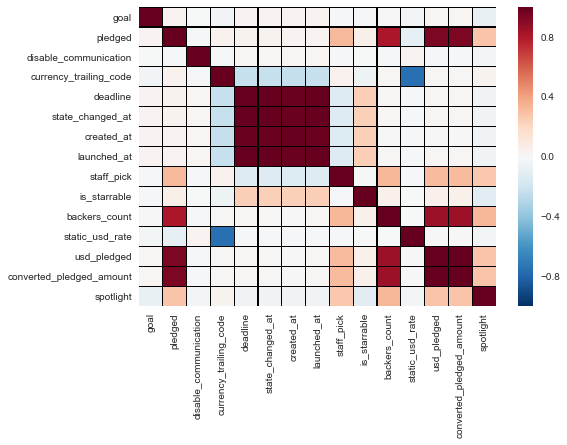

In [69]:
sns.heatmap(numerical_data.corr(),linewidth = ".1", linecolor = "black")

There doesn't seem to be any significant correlation between features that shouldn't be obviously correlated. 

In [24]:
data = pd.read_csv(path + "Kickstarter.csv", header = 0, index_col = 0)
successful = 0
fail = 0

successfuls = []
fails = []

for index,i in enumerate(data["state"]):
    if i == "successful":
        successful += 1
        successfuls.append(data["goal"].iloc[index])
    if i == "failed":
        fail += 1
        fails.append(data["goal"].iloc[index])
"""
fig = plt.figure()
ax = fig.add_subplot(221)
ax.set_title("Goal Money for Succcessful Kickstarters")
ax.histogram(successfuls)
ax = fig.add_subplot(223)
ax.set_title("Goal Money for Failed Kickstarters")
ax.histogram(fails)
"""

successfuls = np.asarray(successfuls)
fails = np.asarray(fails)

mean_success = successfuls.mean()
std_success = successfuls.std()
mean_fails = fails.mean()
std_fails = fails.std()

print "Successful Kickstarters - Mean : " + str(mean_success) + " Standard Deviation : " + str(std_success) + '\n'
print "Failed Kickstarters - Mean : " + str(mean_fails) + " Standard Deviation : " + str(std_fails)

Successful Kickstarters - Mean : 3607.20550969 Standard Deviation : 9290.36047643

Failed Kickstarters - Mean : 88663.1277819 Standard Deviation : 2403957.14434


In [57]:
successful_df = pd.DataFrame(successfuls, columns = ["Successful Campaign Goal Amount"])
fail_df = pd.DataFrame(fails, columns = ["Failed Campaign Goal Amount"])

print successful_df.describe()
print fail_df.describe()

       Successful Campaign Goal Amount
count                      1599.000000
mean                       3607.205510
std                        9293.266893
min                           0.010000
25%                         410.000000
50%                        1200.000000
75%                        3500.000000
max                      200000.000000
       Failed Campaign Goal Amount
count                 2.182000e+03
mean                  8.866313e+04
std                   2.404508e+06
min                   5.000000e+00
25%                   9.500000e+02
50%                   2.550000e+03
75%                   7.000000e+03
max                   1.000000e+08


The goal amount of money for all successful kickstarters and all failed kickstarters is shown above. Based on the mean and standard deviation. Successful campaigns on average have smaller means of around 3607 while failed campaigns have a mean goal amount of 88664. This is understandable since a lower goal amount would make it easier to be completed. 

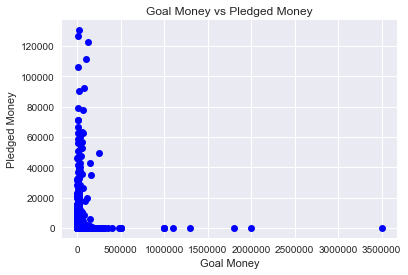

In [61]:
goal_vs_pledged = [numerical_data["goal"],numerical_data["pledged"]]
#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.boxplot(goal_vs_pledged)
"""
mean_goal = numerical_data["goal"].mean()
std_goal = numerical_data["goal"].std()
mean_pledged = numerical_data["pledged"].mean()
std_pledged = numerical_data["pledged"].std()

numerical_data = numerical_data[numerical_data.loc[:,'goal'] < mean_goal + std_goal * 3]
numerical_data = numerical_data[numerical_data.loc[:,'goal'] > mean_goal - std_goal * 3]
numerical_data = numerical_data[numerical_data.loc[:,'pledged'] < mean_pledged + std_pledged * 3]
numerical_data = numerical_data[numerical_data.loc[:,'pledged'] > mean_pledged - std_pledged * 3]
"""
features = ["goal","pledged"]
for feature in features:
    mean = numerical_data[feature].mean()
    std = numerical_data[feature].std()
    numerical_data = numerical_data[numerical_data.loc[:,feature] < mean + std * 3]
    numerical_data = numerical_data[numerical_data.loc[:,feature] > mean - std * 3]
    
plt.plot(numerical_data["goal"], numerical_data["pledged"], "bo")
plt.title("Goal Money vs Pledged Money")
plt.xlabel("Goal Money")
plt.ylabel("Pledged Money")
plt.show()

After removing outliers by only taking data that is one standard deviation from the mean, it looks like the campaigns with lower pledged amoutns have a higher likelyhood of not only reaching their goal but over shooting it. 

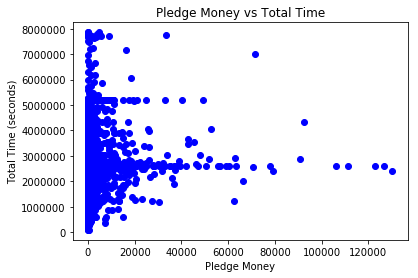

In [59]:
total_time = abs(numerical_data["launched_at"] - numerical_data["deadline"])
plt.plot(numerical_data["pledged"], total_time, "bo")
plt.title("Pledge Money vs Total Time")
plt.xlabel("Pledge Money")
plt.ylabel("Total Time (seconds)")
plt.show()

There does not seem to be much of a linear relationship between the total time a kickstarter is live and total money pledged.

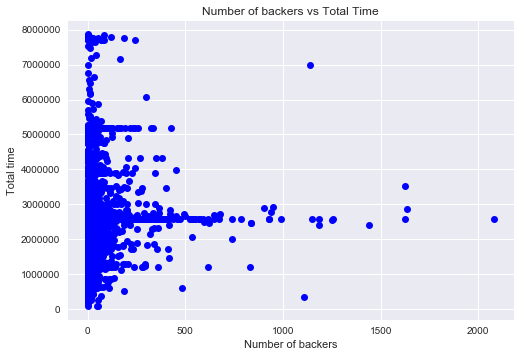

In [71]:
plt.plot(numerical_data["backers_count"], total_time, "bo")
plt.title("Number of backers vs Total Time")
plt.xlabel("Number of backers")
plt.ylabel("Total time")
plt.show()

The overall shape of the graph is similar to the graph of Pledged money vs Total Time, therefore, there is a correlation between the number of backers and the pledged money which would make sense. 

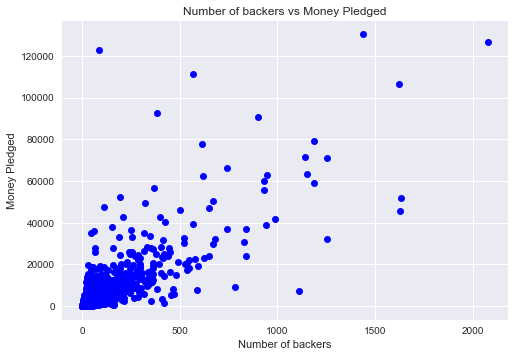

In [73]:
plt.plot(numerical_data["backers_count"], numerical_data["pledged"], "bo")
plt.title("Number of backers vs Money Pledged")
plt.xlabel("Number of backers")
plt.ylabel("Money Pledged")
plt.show()

There seems to be a linear correlation between number of backers and pledged amount.